In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd

In [7]:
# Function to read in text file
def read_txt_file(file_path):
    if not os.path.exists(file_path):
        print(f"File {file_path} not found.")
        return None
    else:
        return np.loadtxt(file_path)

In [8]:
import matplotlib.pyplot as plt

def plot_event(df, event_number, df_name="", channels=None):
    """
    Plot a chosen event for specified channels or all channels if none specified.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the event data.
    event_number (int): The event number to plot.
    df_name (str, optional): Name of the DataFrame for the title.
    channels (list, optional): A list of channel names to plot. If None, plot all channels.
    """
    event = df.loc[event_number]
    
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed
    
    if channels is None:
        # If no channels specified, plot all numeric columns
        channels = event.select_dtypes(include=['number']).columns
        # Remove 'Event number' if it exists
        channels = [col for col in channels if col != 'Event number']
    
    for channel in channels:
        if channel in event:
            plt.plot(event[channel], label=channel)
        else:
            print(f"Warning: Channel '{channel}' not found in the data.")
    
    # Create title with DataFrame name if provided
    title = f"Event {event_number}"
    if df_name:
        title = f"{df_name}: {title}"
    
    plt.title(title)
    plt.xlabel("Sample number")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# plot_event(df, 0, "MyDataFrame")  # This will plot all channels and include "MyDataFrame" in the title
# plot_event(df, 0, "MyDataFrame", ["TR0_0", "wave_0"])  # This will plot only TR0_0 and wave_0 with "MyDataFrame" in the title

In [9]:
# Read in all the data from each file
voltage = 26

TR0_f = read_txt_file(f"./data/{voltage}/TR_0_0.txt")
TR1_f = read_txt_file(f"./data/{voltage}/TR_0_1.txt")
wave0_f = read_txt_file(f"./data/{voltage}/wave_0.txt")
wave1_f = read_txt_file(f"./data/{voltage}/wave_1.txt")

# Check if all files were read successfully
if any(x is None for x in [TR0_f, TR1_f, wave0_f, wave1_f]):
    print("Error reading one or more files. Exiting.")
    exit()

# Create an empty list to store the data for each event
data = []

# Calculate the number of complete events (assuming all files have the same length)
num_events = len(TR0_f) // 1024
print(f"Found {num_events} events in the data")
event_data = {}

for i in range(num_events):
    x = i * 1024
    event_data = {
        "Event number": i,
        "TR0_0": TR0_f[x:x+1024],
        "TR0_1": TR1_f[x:x+1024],
        "wave_0": wave0_f[x:x+1024],
        "wave_1": wave1_f[x:x+1024]
    }
    data.append(event_data)

# Create the DataFrame
df = pd.DataFrame(data)

print(f"Created DataFrame with {len(df)} events and {len(df.columns)} columns")
print(df.head())

# Example: Plot the first eve

Found 12276 events in the data
Created DataFrame with 12276 events and 5 columns
   Event number                                              TR0_0  \
0             0  [95.0, 95.0, 81.070953, 102.832336, 95.074608,...   
1             1  [67.0, 67.017754, 73.006531, 73.957985, 70.212...   
2             2  [86.0, 86.079285, 95.881096, 88.044334, 89.594...   
3             3  [87.0, 87.0, 81.008965, 86.984268, 97.957924, ...   
4             4  [103.0, 102.913292, 89.120689, 98.897652, 92.8...   

                                               TR0_1  \
0  [97.0, 97.0, 97.0, 89.060699, 86.030128, 98.83...   
1  [97.0, 96.955147, 83.993332, 83.100174, 92.777...   
2  [96.0, 95.973251, 89.958099, 85.061844, 89.937...   
3  [92.0, 91.997459, 90.99469, 89.984917, 88.1674...   
4  [121.0, 120.935532, 108.019287, 110.068176, 11...   

                                              wave_0  \
0  [267.0, 267.0, 267.994934, 280.900909, 277.037...   
1  [263.0, 263.023682, 270.941254, 262.073517, 26

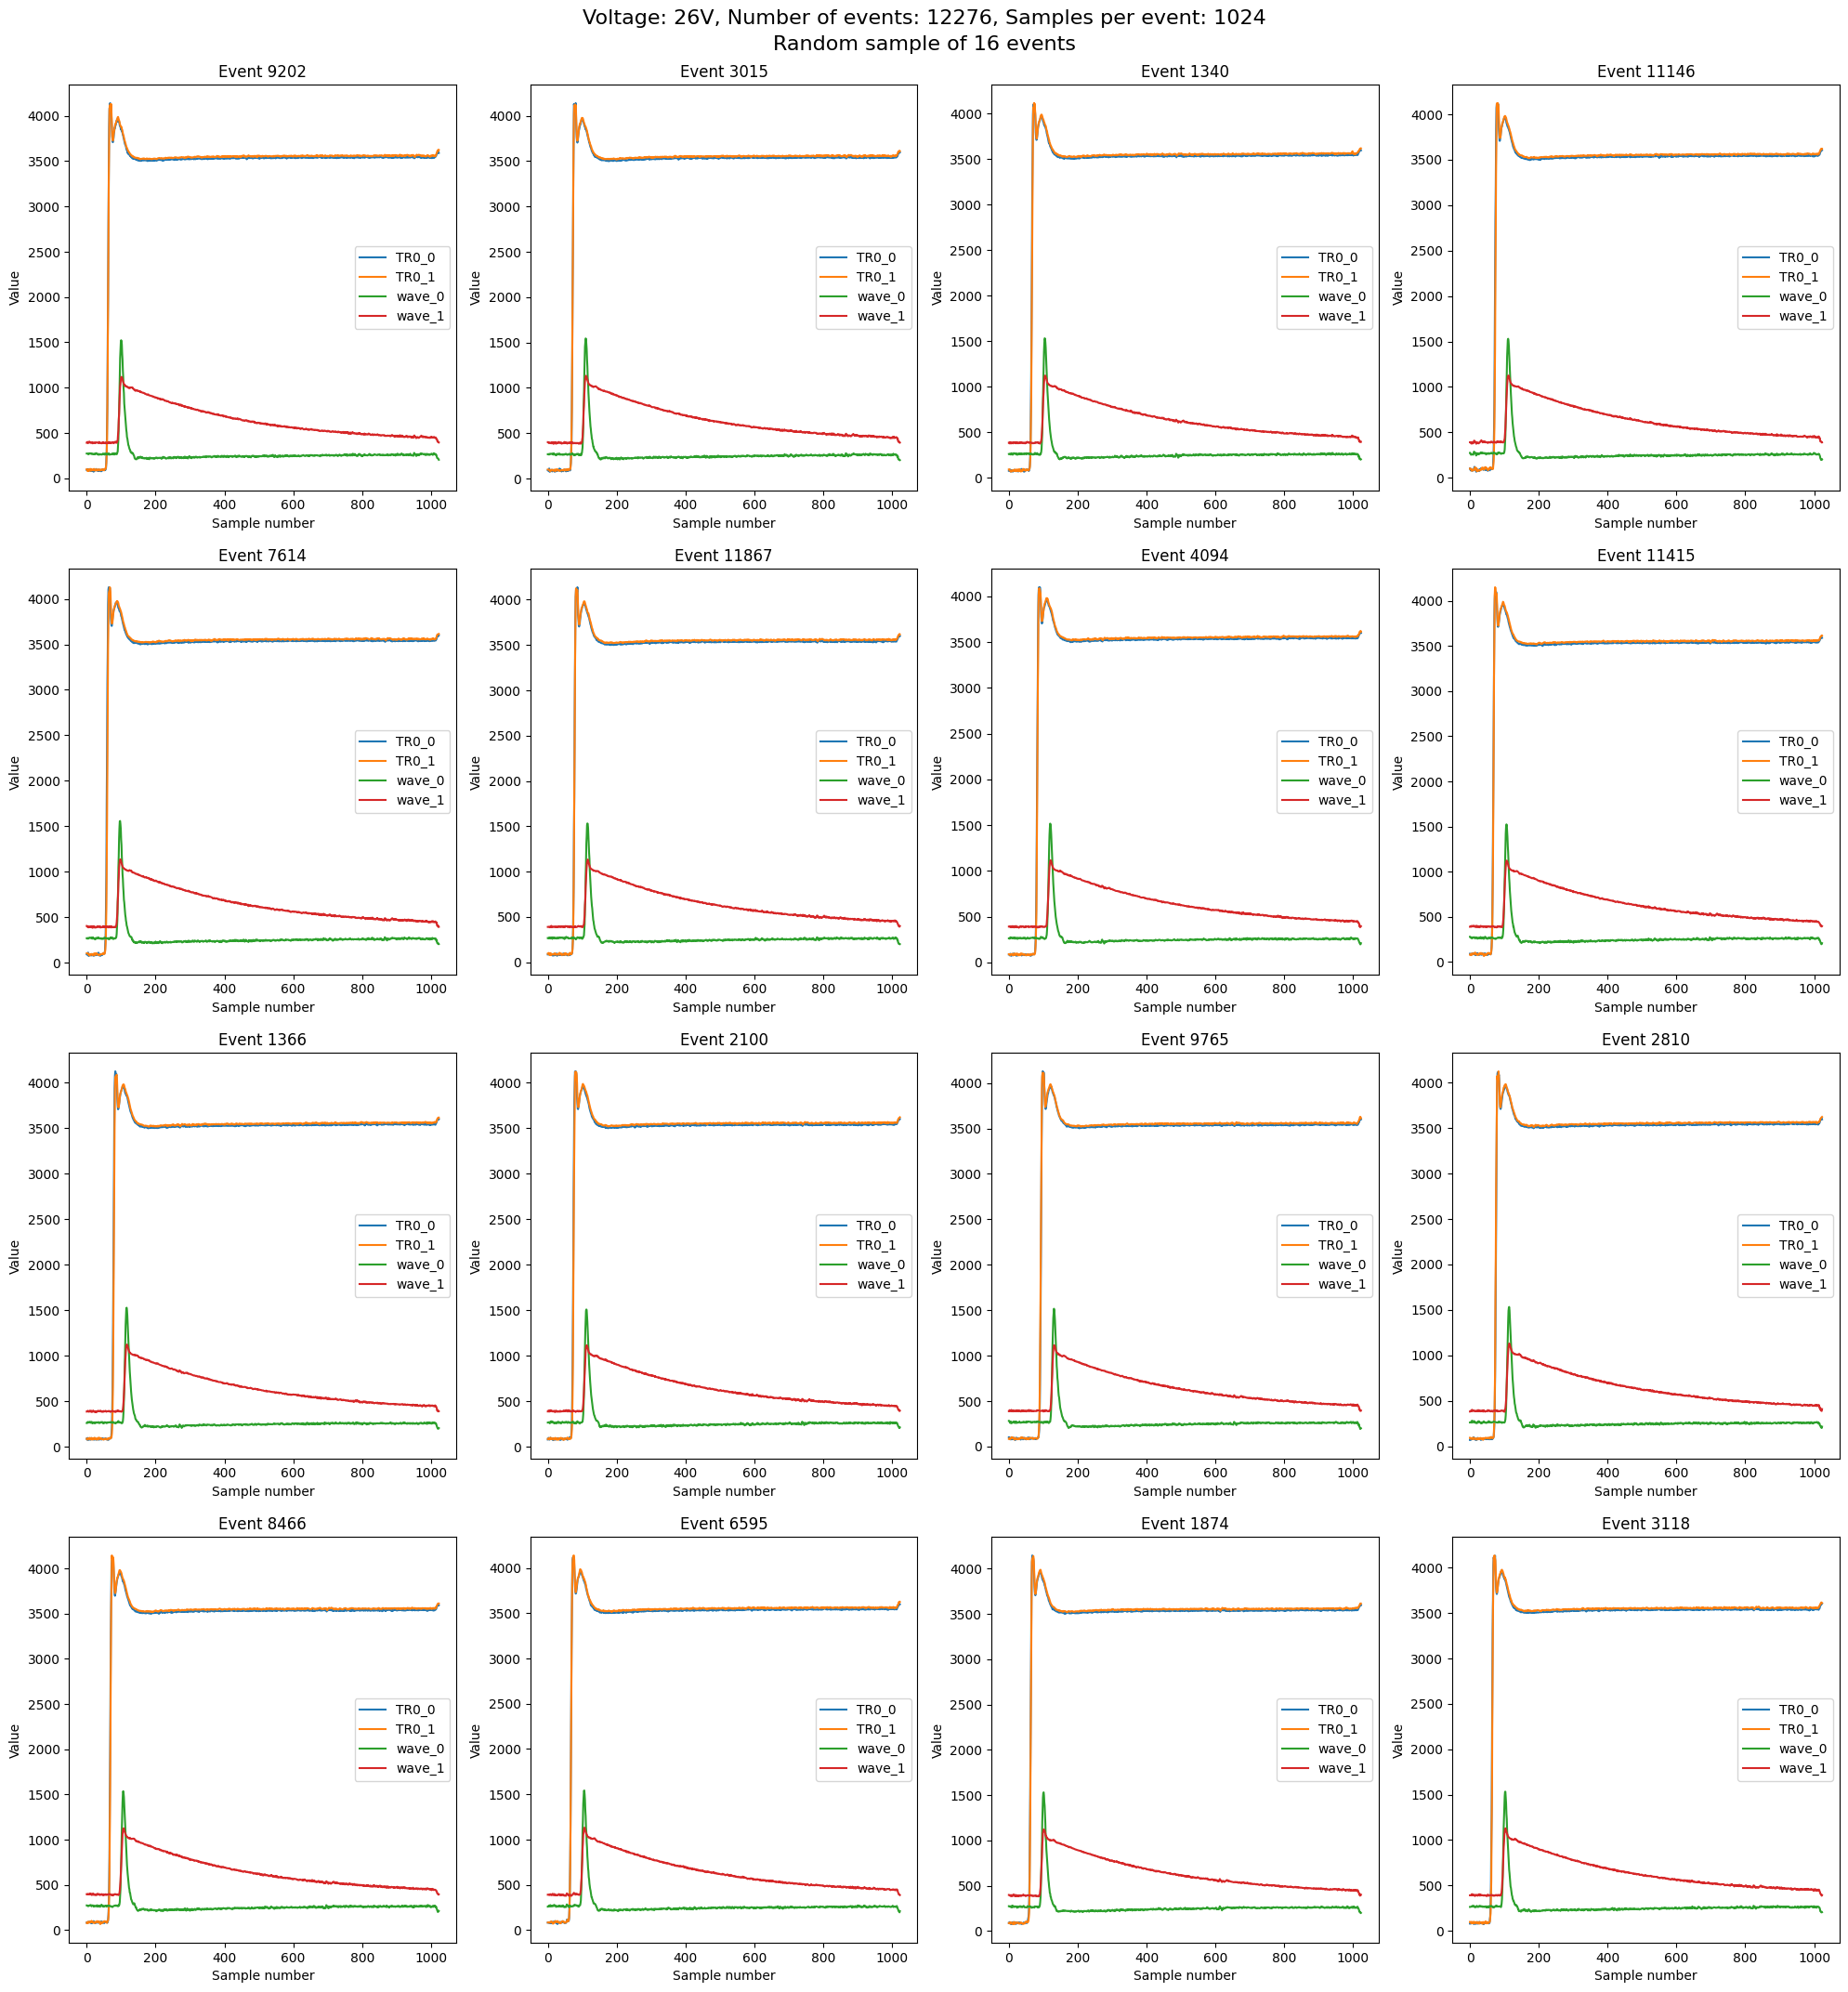

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create the 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

# Plot random 16 events
for i in range(16):
    event_number = np.random.randint(0, num_events)
    event = df.loc[event_number]
    ax = axs[i // 4, i % 4]
    ax.plot(event["TR0_0"])
    ax.plot(event["TR0_1"])
    ax.plot(event["wave_0"])
    ax.plot(event["wave_1"])
    ax.set_title(f"Event {event_number}")
    ax.set_xlabel("Sample number")
    ax.set_ylabel("Value")
    ax.legend(["TR0_0", "TR0_1", "wave_0", "wave_1"])

# Adjust the layout
plt.tight_layout()

# Add the main title with adjusted positioning
fig.suptitle(f"Voltage: {voltage}V, Number of events: {num_events}, Samples per event: 1024\nRandom sample of 16 events",
             fontsize=16, y=1.02, linespacing=1.5)

# Adjust the figure size to accommodate the title
fig.set_size_inches(20, 21)  # Increased height by 1 inch

# Show the plot
plt.show()

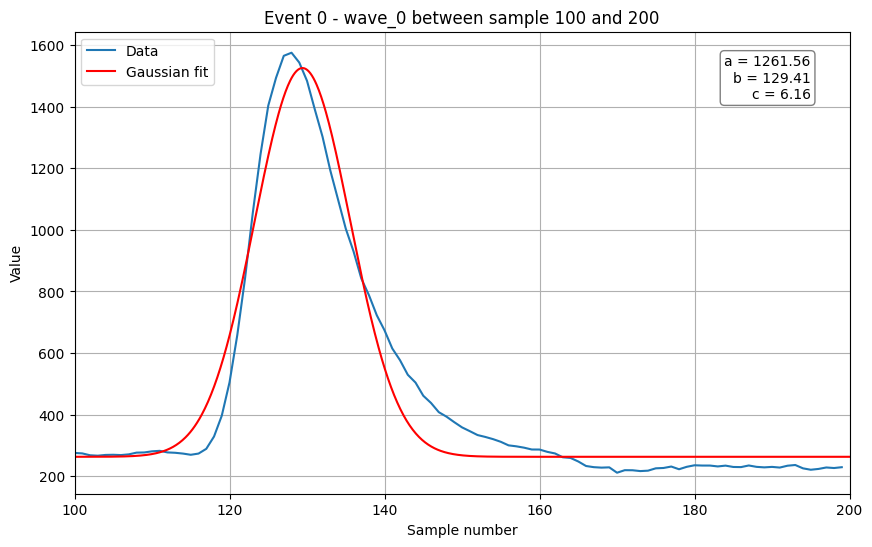

Fit parameters: a = 1261.56, b = 129.41, c = 6.16


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Plot wave_0 for a chosen event only between sample number 100 and 200
event_number = 0
event = df.loc[event_number]
range_start, range_end = 100, 200

# Create x-axis values
x_values = np.arange(range_start, range_end)

# Get the y-values for the specified range
y_values = event["wave_0"][range_start:range_end]

# Plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(x_values, y_values, label='Data')
plt.title(f"Event {event_number} - wave_0 between sample {range_start} and {range_end}")
plt.xlabel("Sample number")
plt.ylabel("Value")
plt.xlim(range_start, range_end)
plt.grid(True)

# Define the Gaussian function
def gaussian(x, a, b, c, d):
    return (a * np.exp(-((x - b) ** 2) / (2 * c ** 2))) + d

# Fit the Gaussian to the data
fit, _ = curve_fit(gaussian, x_values, y_values, p0=[max(y_values), np.mean(x_values), 10, min(y_values)])

# Extract the parameters
a, b, c, d = fit

# Plot the Gaussian fit
x_fit = np.linspace(range_start, range_end, 1000)
plt.plot(x_fit, gaussian(x_fit, a, b, c, d ), label="Gaussian fit", color='red')

# Add the legend
plt.legend()

# Add text box with fit parameters
plt.text(0.95, 0.95, f'a = {a:.2f}\nb = {b:.2f}\nc = {c:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top', 
         horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Show the plot
plt.show()

print(f"Fit parameters: a = {a:.2f}, b = {b:.2f}, c = {c:.2f}")

In [12]:
#export the data to a csv file
#df.to_csv(f"./data/{voltage}/data.csv", index=False)



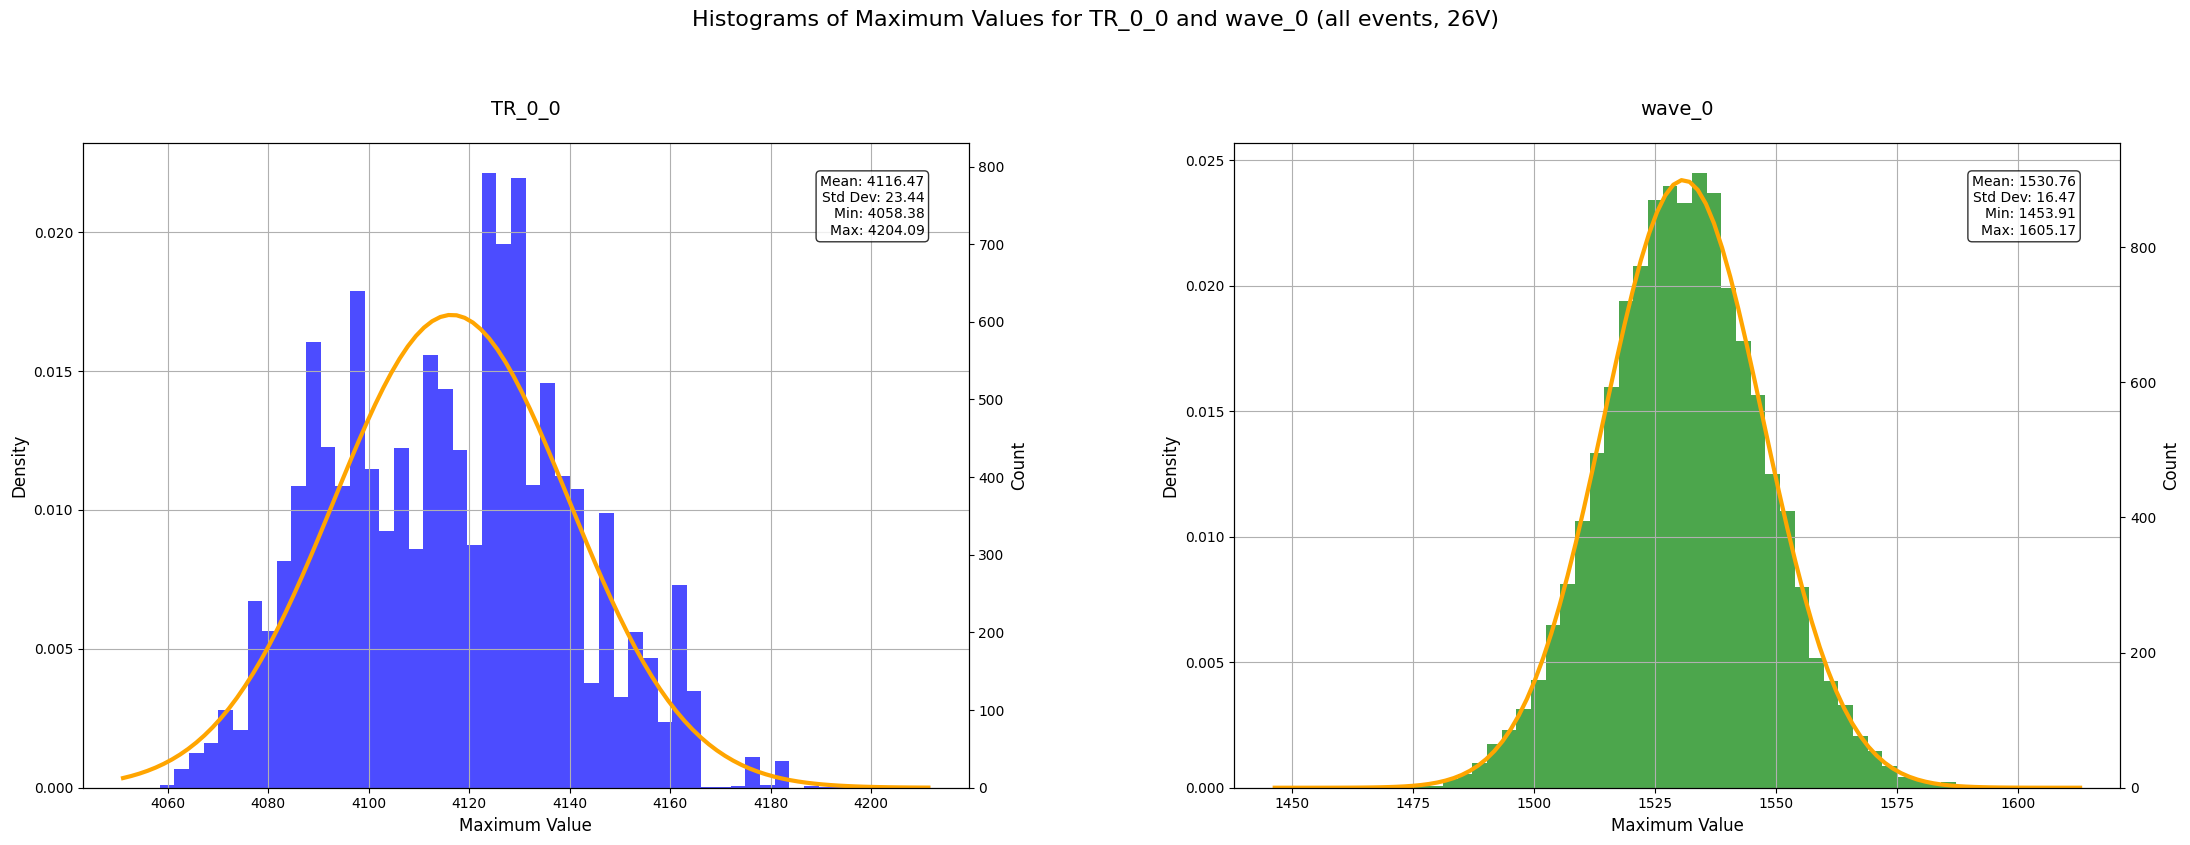

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def create_max_value_histograms(df, voltage):
    max_TR_0_0 = df['TR0_0'].apply(np.max)
    max_wave_0 = df['wave_0'].apply(np.max)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))  # Increased figure width
    fig.suptitle(f"Histograms of Maximum Values for TR_0_0 and wave_0 (all events, {voltage}V)", 
                 fontsize=16, y=1.05)  # Moved title up slightly

    def plot_histogram(ax, data, title, color):
        ax_count = ax.twinx()
        
        n, bins, patches = ax.hist(data, bins=50, density=True, alpha=0.7, color=color)
        ax_count.hist(data, bins=bins, alpha=0)
        
        mu, sigma = stats.norm.fit(data)
        
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, sigma)
        ax.plot(x, p, 'orange', linewidth=3)
        
        ax.set_title(title, fontsize=14, pad=20)  # Increased title font size and padding
        ax.set_xlabel('Maximum Value', fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
        ax_count.set_ylabel('Count', fontsize=12)
        ax.grid(True)
        
        stats_text = f'Mean: {mu:.2f}\nStd Dev: {sigma:.2f}\nMin: {data.min():.2f}\nMax: {data.max():.2f}'
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        return ax, ax_count

    ax1, ax1_count = plot_histogram(ax1, max_TR_0_0, 'TR_0_0', 'blue')
    ax2, ax2_count = plot_histogram(ax2, max_wave_0, 'wave_0', 'green')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)  # Increase space between subplots

    plt.show()

    return max_TR_0_0, max_wave_0

# Use the function
voltage = 26  # or whatever your voltage value is
max_TR_0_0, max_wave_0 = create_max_value_histograms(df, voltage)

# repeat for voltages 25 and 27
voltage = 25

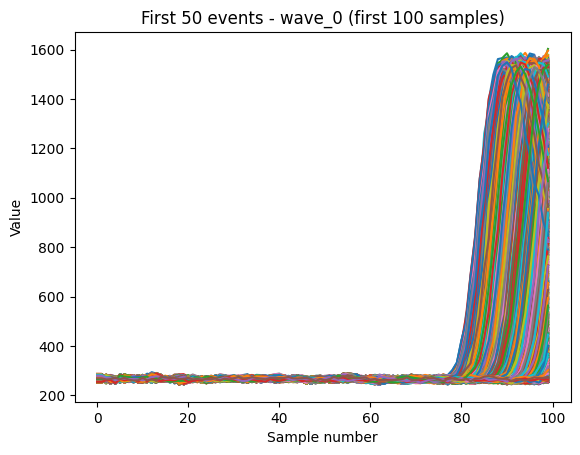

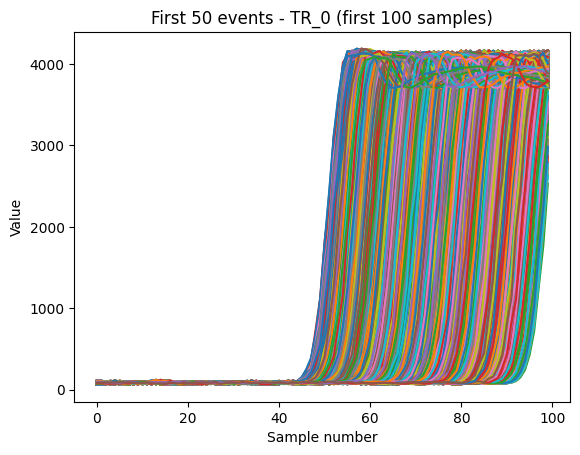

In [14]:
#Baseline subtraction

#plot to tell where cut off should be
for i in range(len(df)):
    event = df.loc[i]
    plt.plot(event["wave_0"][:100])
plt.title("First 50 events - wave_0 (first 100 samples)")
plt.xlabel("Sample number")
plt.ylabel("Value")
plt.show()
#cut off at sample 60 for wave 0




for i in range(len(df)):    
    event = df.loc[i]
    plt.plot(event["TR0_0"][:100])
plt.title("First 50 events - TR_0 (first 100 samples)")
plt.xlabel("Sample number")
plt.ylabel("Value")
plt.show()
#cut off at sample 40 for TR0_0





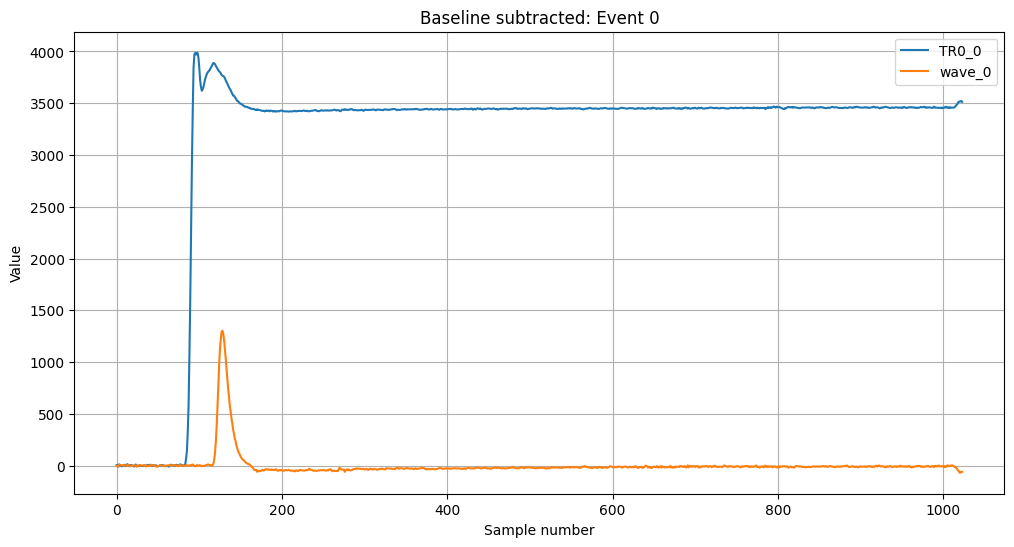

In [15]:
#create new df for baseline subtracted data
df_baseline_subtracted = df.copy()
#remove TR1_0 and wave_1
df_baseline_subtracted = df_baseline_subtracted.drop(columns=["TR0_1", "wave_1"])

#subtract the baseline
df_baseline_subtracted["wave_0"] = df_baseline_subtracted["wave_0"].apply(lambda x: x - np.mean(x[:60]))
df_baseline_subtracted["TR0_0"] = df_baseline_subtracted["TR0_0"].apply(lambda x: x - np.mean(x[:40]))

#plot the first event to check

plot_event(df_baseline_subtracted, 0, "Baseline subtracted", ["TR0_0", "wave_0"])
#edit the title to say baseline subtracted

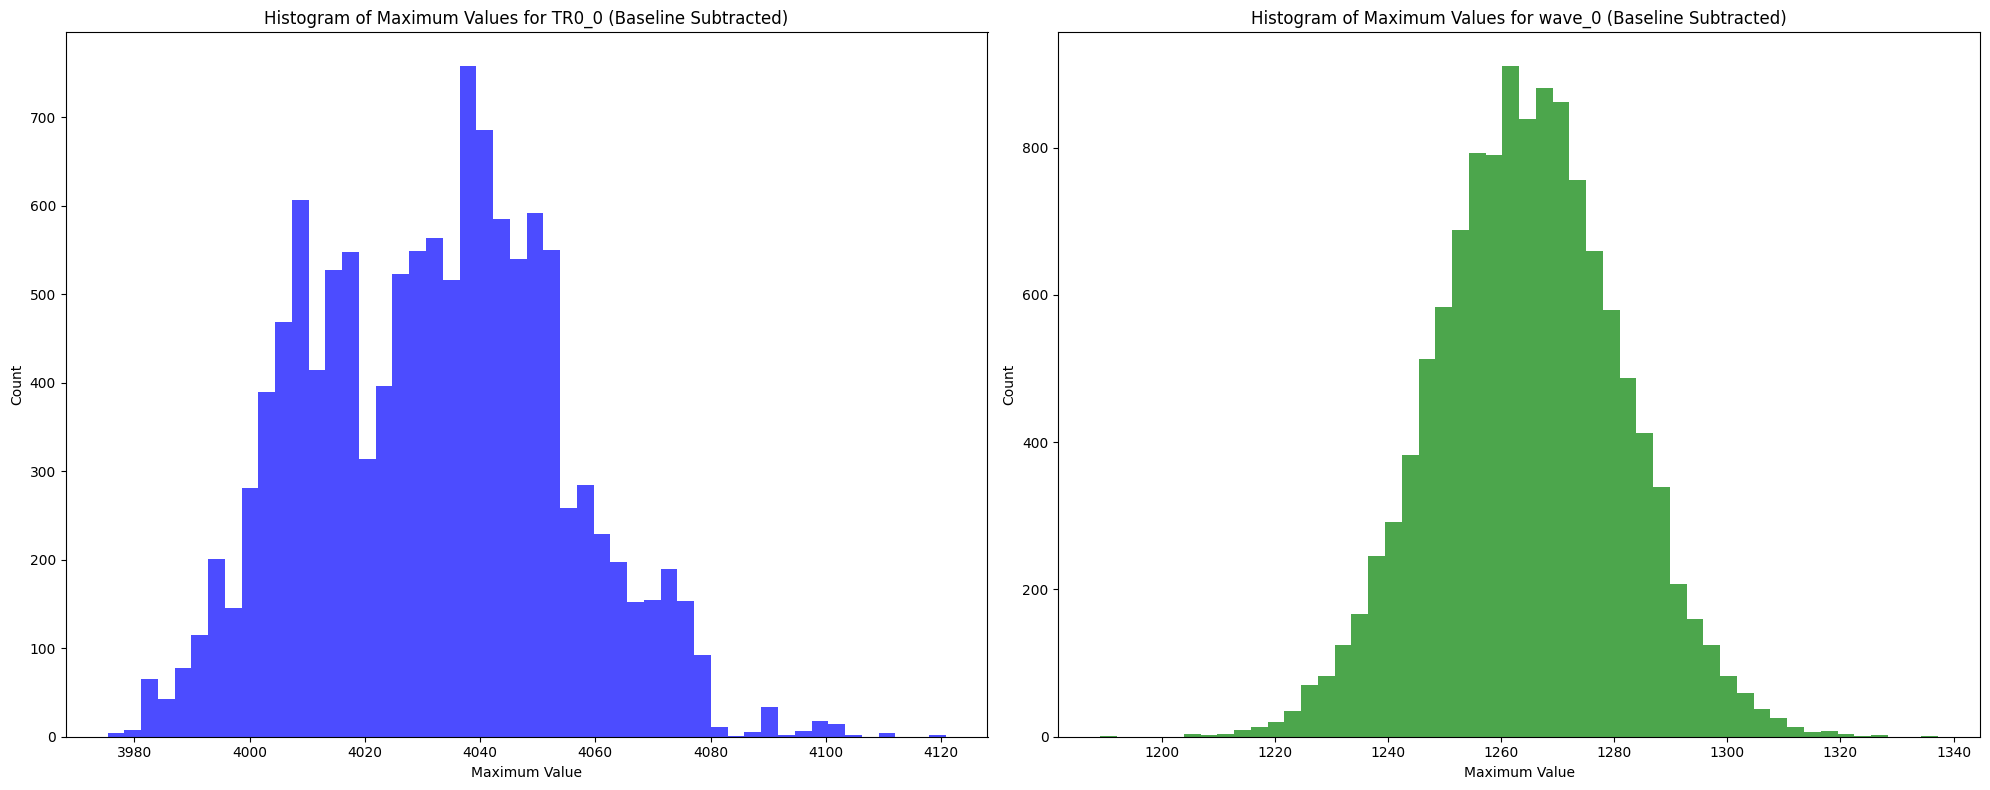

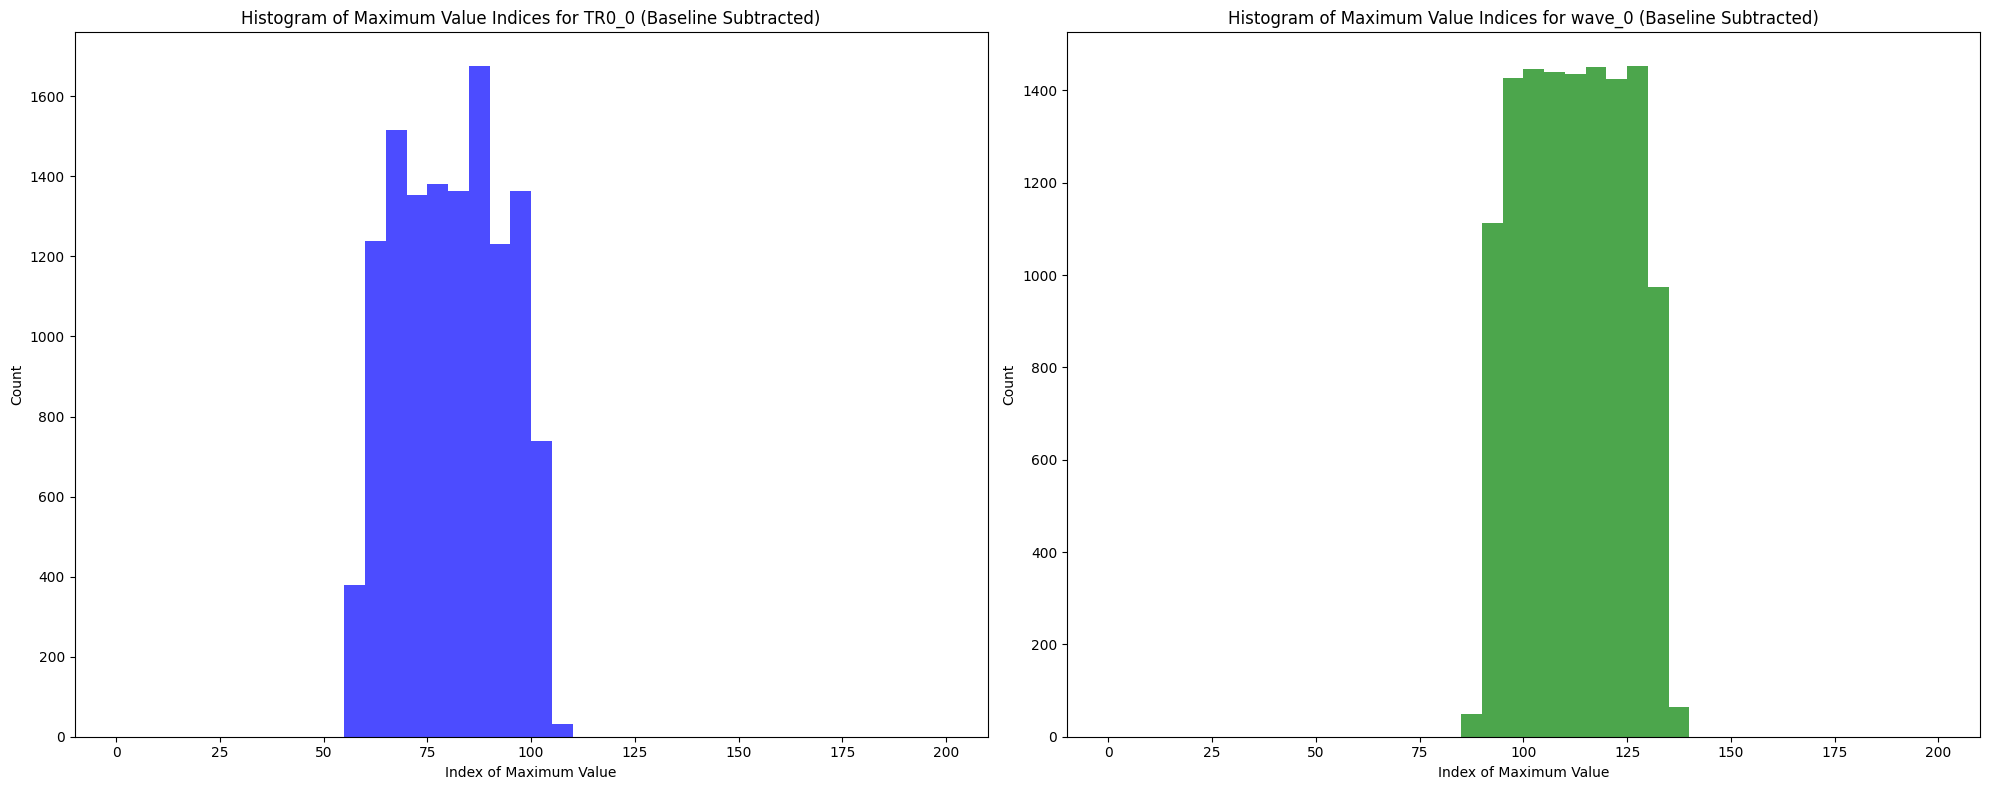

In [16]:
#Add new columnds to the df for the max values and where they occur
df_baseline_subtracted["max_TR0_0"] = df_baseline_subtracted["TR0_0"].apply(np.max)
df_baseline_subtracted["max_TR0_0_index"] = df_baseline_subtracted["TR0_0"].apply(np.argmax)

df_baseline_subtracted["max_wave_0"] = df_baseline_subtracted["wave_0"].apply(np.max)
df_baseline_subtracted["max_wave_0_index"] = df_baseline_subtracted["wave_0"].apply(np.argmax)

#plot the max values
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].hist(df_baseline_subtracted["max_TR0_0"], bins=50, color='blue', alpha=0.7)
axs[0].set_title("Histogram of Maximum Values for TR0_0 (Baseline Subtracted)")
axs[0].set_xlabel("Maximum Value")
axs[0].set_ylabel("Count")

axs[1].hist(df_baseline_subtracted["max_wave_0"], bins=50, color='green', alpha=0.7)
axs[1].set_title("Histogram of Maximum Values for wave_0 (Baseline Subtracted)")
axs[1].set_xlabel("Maximum Value")
axs[1].set_ylabel("Count")

#fit a gaussian to the data


plt.tight_layout()
plt.show()

#plot the max values
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].hist(df_baseline_subtracted["max_TR0_0_index"], bins=40, color='blue', alpha=0.7, range = (0, 200))
axs[0].set_title("Histogram of Maximum Value Indices for TR0_0 (Baseline Subtracted)")
axs[0].set_xlabel("Index of Maximum Value")
axs[0].set_ylabel("Count")

axs[1].hist(df_baseline_subtracted["max_wave_0_index"], bins=40, color='green', alpha=0.7, range=(0, 200))
axs[1].set_title("Histogram of Maximum Value Indices for wave_0 (Baseline Subtracted)")
axs[1].set_xlabel("Index of Maximum Value")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()



In [17]:
#Get leading edge time

def get_leading_edge_time(df , i, threshold=0.5):
    # Find the index where the value first exceeds the threshold
    # threshold value is 0.5 of the max value
    event_tr = df.loc[i]["TR0_0"]
    max_value_TR = df.loc[i]["max_TR0_0"]
    max_value_TR_th = max_value_TR * threshold

    event_wave = df.loc[i]["wave_0"]
    max_value_wave = df.loc[i]["max_wave_0"]
    max_value_wave_th = max_value_wave * threshold

    leading_edge_index_TR = np.argmax(event_tr > max_value_TR_th)

    leading_edge_index_wave = np.argmax(event_wave > max_value_wave_th)


    return leading_edge_index_TR, leading_edge_index_wave


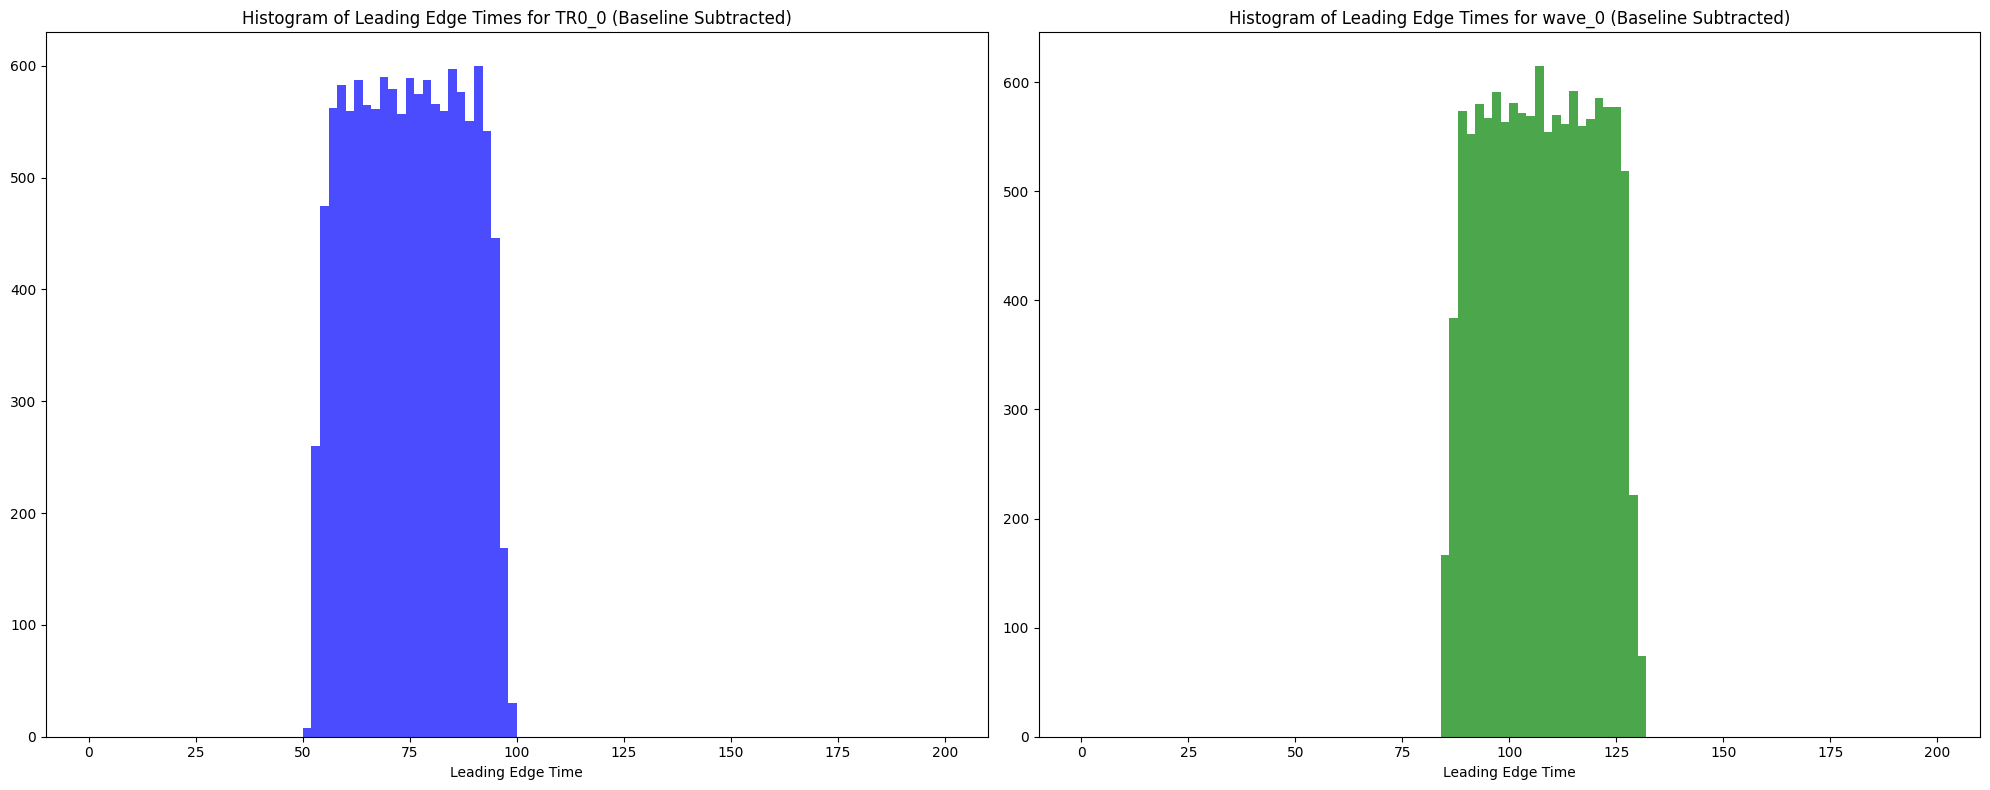

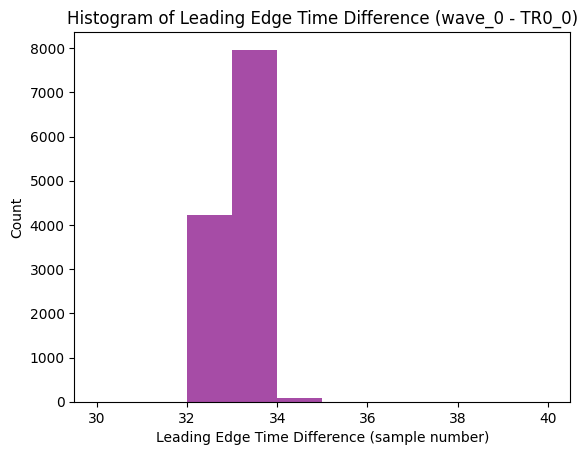

In [18]:

# Calculate leading edge time for all events
df_baseline_subtracted["leading_edge_TR0_0"], df_baseline_subtracted["leading_edge_wave_0"] = zip(*[(get_leading_edge_time(df_baseline_subtracted, i)) for i in range(len(df_baseline_subtracted))])



# Plot the leading edge times
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].hist(df_baseline_subtracted["leading_edge_TR0_0"], bins=100, color='blue', alpha=0.7, range = (0, 200))
axs[0].set_title("Histogram of Leading Edge Times for TR0_0 (Baseline Subtracted)")
axs[0].set_xlabel("Leading Edge Time")

axs[1].hist(df_baseline_subtracted["leading_edge_wave_0"], bins=100, color='green', alpha=0.7, range = (0, 200))
axs[1].set_title("Histogram of Leading Edge Times for wave_0 (Baseline Subtracted)")
axs[1].set_xlabel("Leading Edge Time")

plt.tight_layout()
plt.show()


#plot the leading edge wave_0 - leading edge TR0_0
plt.hist(df_baseline_subtracted["leading_edge_wave_0"] - df_baseline_subtracted["leading_edge_TR0_0"], bins=10, color='purple', alpha=0.7, range=(30, 40))
plt.title("Histogram of Leading Edge Time Difference (wave_0 - TR0_0)")
plt.xlabel("Leading Edge Time Difference (sample number)")
plt.ylabel("Count")
plt.show()





In [19]:
len(df_baseline_subtracted["leading_edge_wave_0"] - df_baseline_subtracted["leading_edge_TR0_0"])

12276

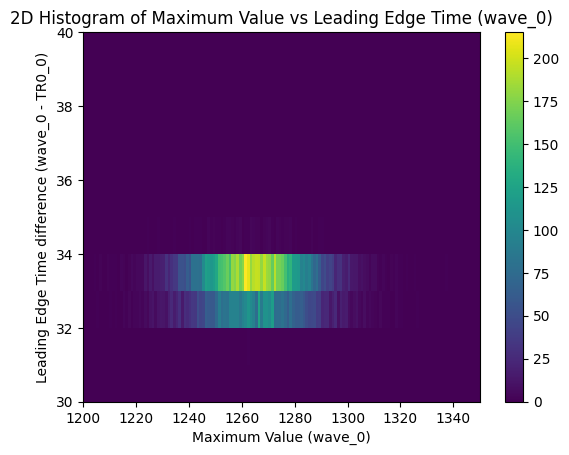

In [23]:
if 'leading_edge_diff' not in df_baseline_subtracted.columns:
    df_baseline_subtracted['leading_edge_diff'] = df_baseline_subtracted['leading_edge_wave_0'] - df_baseline_subtracted['leading_edge_TR0_0']

plt.hist2d(df_baseline_subtracted['max_wave_0'], df_baseline_subtracted['leading_edge_diff'], bins=(150, 10), cmap='viridis', range = [[1200, 1350], [30, 40]])
plt.colorbar()
plt.xlabel('Maximum Value (wave_0)')
plt.ylabel('Leading Edge Time difference (wave_0 - TR0_0)')
plt.title('2D Histogram of Maximum Value vs Leading Edge Time (wave_0)')
plt.show()
